# Financial Fraud Dataset Overview

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.api import abline_plot
from random import sample 

In [3]:
#Read in raw finanical fraud dataset CSV
df = pd.read_csv("/Users/sa14/Desktop/FinancialFraudData_EDA/FinFraudData.csv")

In [24]:
#Get first 10 rows of the dataset
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
#Get the count of rows and columns for the dataset
df.shape

(6362620, 11)

**This raw dataset has 6,362,620 rows and 11 columns.**

In [ ]:
#Get index/rows of the dataset
df.index

RangeIndex(start=0, stop=6362620, step=1)

In [39]:
#Get overall count of null/NaN values in the dataset

nan_count = df.isnull().sum()

print("Null Values by Column",  
      nan_count)

Null Values by Column step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


**This dataset does not contain any null values across all 11 columns.**

In [ ]:
#Describe the summary statistics of each numerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
#Determine the descriptive statistics of the dataset such as the mean, median, percentiles, etc.
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Univariate Analysis

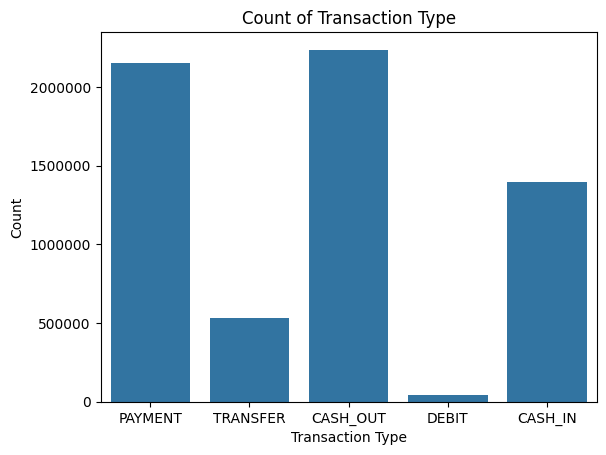

In [40]:
#Create bar graph for univariate analysis of the count of the types of transactions
sns.countplot(data=df, x='type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

#Remove scientfic notation from y axis 
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.title('Count of Transaction Type')
plt.show()

In [41]:
#Get count of unique transactions labeled isFraud
isfraud_count = df["isFraud"].value_counts()

#Convert isfraud_count to a dataframe
isfraud_count.to_frame()

,count
isFraud,
0,6354407
1,8213


> #### Pre-Existing Information about the *"IsFraud"* column 
>
>> Was this simulated transaction actually fraudulent? In this case, we consider “fraud” to be a malicious transaction that aimed to transfer funds out of a victim’s bank account before the account owner could secure their information. 


> #### *IsFraud* column unique value count
>
>> * 0 =  Indicates that the transaction is *not* fraud
>> * 1 = Indicates that the transaction *is* fraud

>> There are 6,354,407 total **non-fradulent** transactions out of 6,362,620 overalls transactions. 

>> There are 8,213 total **fraudlent** transactions out of 6,362,620 overall transactions.

In [43]:
#Get count of unique transactions labeled isFlaggedFraud
flagged_count = df["isFlaggedFraud"].value_counts()

#Turn the flagged_count series into a dataframe
flagged_count.to_frame()

,count
isFlaggedFraud,
0,6362604
1,16


> #### Pre-Existing Information about the *"IsFlaggedFraud"* column 
>
>> A “naive” model that simply flags a transaction as fraudulent if it is greater than 200,000 (note that this currency is not USD) 


> #### *IsFraud* column unique value count details
>
>> * 0 =  Indicates that the transaction has been *not* flagged as fraud
>> * 1 = Indicates that the transaction *has* been flagged as fraud

>> There are 6,362,604 total transactions flaggeed as **not** fraudlent out of 6,362,620 overalls transactions. 

>> **There are only *16* total fraudlent transactions out of 6,362,620 overall transactions.**